In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import joblib
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_val_score, HalvingGridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

warnings.filterwarnings('ignore')

In [76]:
%matplotlib inline

In [77]:
X_train, y_train, X_test, y_test = joblib.load('data_FAA/data.pkl')

In [4]:
X_train.columns

Index(['pipeline-1__RoomService', 'pipeline-1__FoodCourt',
       'pipeline-1__ShoppingMall', 'pipeline-1__Spa', 'pipeline-1__VRDeck',
       'pipeline-1__CabinNumber', 'pipeline-2__HomePlanet',
       'pipeline-2__CryoSleep', 'pipeline-2__Destination', 'pipeline-2__VIP',
       'pipeline-2__Group', 'pipeline-2__Group_id', 'pipeline-2__Surname',
       'pipeline-2__Deck', 'pipeline-2__CabinSide', 'pipeline-2__age',
       'pipeline-2__total'],
      dtype='object')

In [78]:
from sklearn.svm import SVC

PARAMETERS = {'kernel' : ["linear", "rbf", "sigmoid"],
              'C': [3, 5, 7, 9, 11, 13, 15]}

# HalvingGridSearchCV
svc2_search = HalvingGridSearchCV(estimator=SVC(),param_grid=PARAMETERS,verbose = 1,
                                                           cv = 5,scoring='accuracy',max_resources=2000,random_state = 0,
                                                           resource='n_samples',n_jobs=-1).fit(X_train.values, y_train.values.ravel())

svc2_best = svc2_search.best_estimator_
print("SVC")
print('SVC Best Score',svc2_search.best_score_)
print('SVC Best Parmas',svc2_search.best_params_)
print('SVC Accuracy',cross_val_score(svc2_best,X_train.values, y_train.values.ravel(), cv=5).mean())

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 222
max_resources_: 2000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 21
n_resources: 222
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 1
n_candidates: 7
n_resources: 666
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 1998
Fitting 5 folds for each of 3 candidates, totalling 15 fits
SVC
SVC Best Score 0.7393483709273184
SVC Best Parmas {'C': 7, 'kernel': 'linear'}


KeyboardInterrupt: 

In [7]:
from sklearn.svm import SVC

PARAMETERS = {'kernel' : ['poly'],
              'degree': [1, 3, 5, 7, 9],
              'coef0': [1, 3, 5],
              'C': [3,5, 7, 9, 11]}

# HalvingGridSearchCV
svc_search = HalvingGridSearchCV(estimator=SVC(),param_grid=PARAMETERS,verbose = 1,
                                                           cv = 5,scoring='accuracy',max_resources=2000,random_state = 0,
                                                           resource='n_samples',n_jobs=-1).fit(X_train.values, y_train.values.ravel())

svc_best = svc_search.best_estimator_
print("Polinomial SVC")
print('SVC Best Score',svc_search.best_score_)
print('SVC Best Parmas',svc_search.best_params_)
print('SVC Accuracy',cross_val_score(svc_best,X_train.values, y_train.values.ravel(), cv=10).mean())

In [ ]:
svc_search = grid_search_xgb
svc_best = xgbr_best

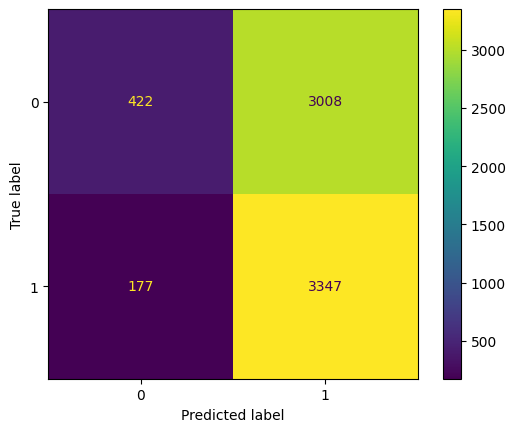

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
svc2_best = SVC(kernel="poly", degree=7, C=11)
y_pred = cross_val_predict(svc2_best, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
plt.show()

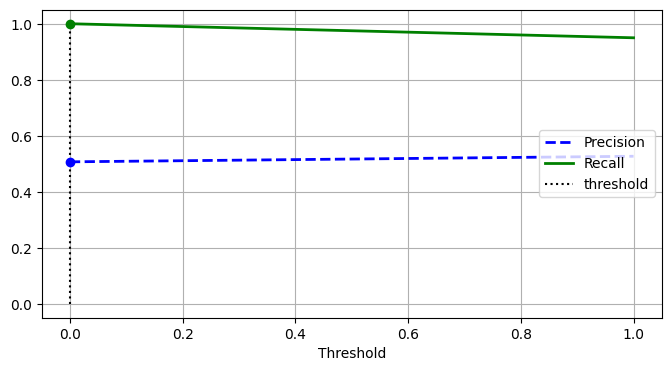

In [80]:
from sklearn.metrics import precision_recall_curve
#Precision vs Recall Trade Of

precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred)

threshold = 0
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
# plt.axis([-1, 1, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

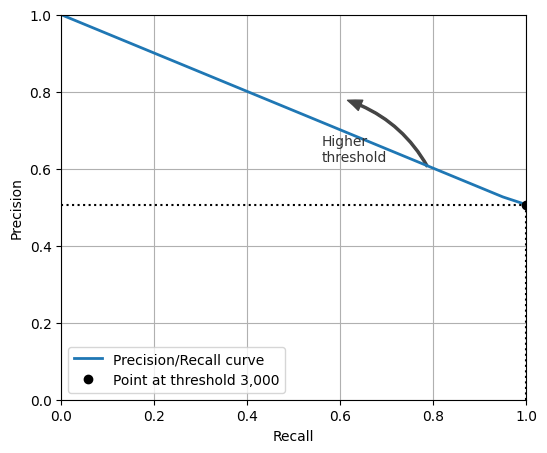

In [81]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score

In [83]:
idx_for_90_precision = (precisions >= 0.50).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print(threshold_for_90_precision)

y_train_pred_90 = (y_pred >= threshold_for_90_precision)

print(precision_score(y_train, y_train_pred_90))
recall_at_90_precision = recall_score(y_train, y_train_pred_90)
print(recall_at_90_precision)

0
0.5067587000287604
1.0


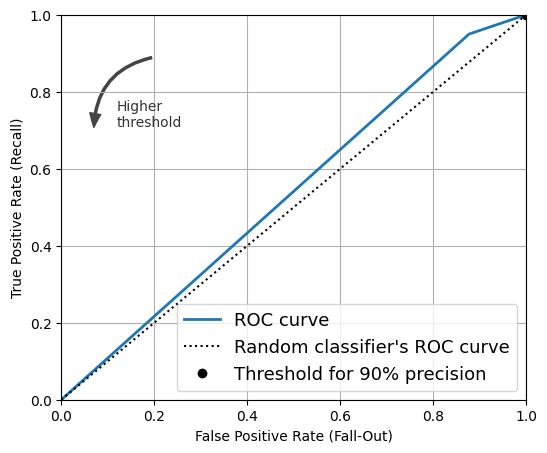

In [84]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

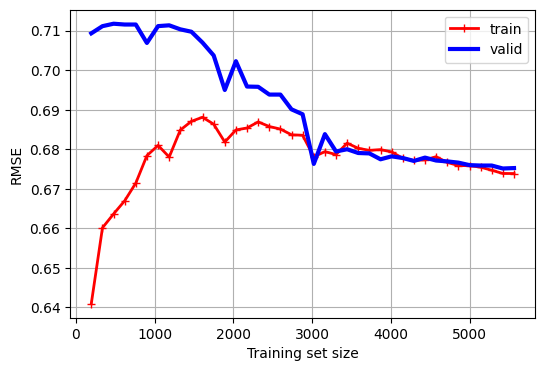

In [85]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    svc2_best, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
# plt.axis([0, 1000, 0.3, 0.9])
# plt.save_fig("underfitting_learning_curves_plot")

plt.show()

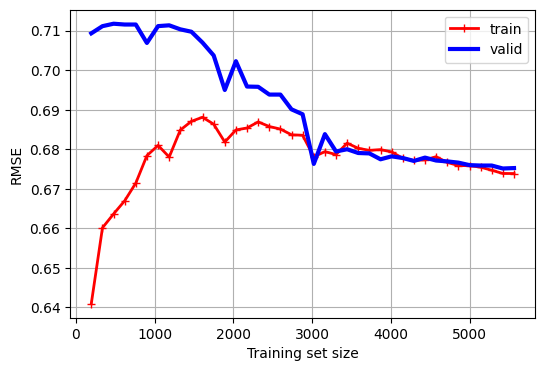

In [86]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
# plt.axis([0, 1000, 0.3, 0.9])
# plt.save_fig("underfitting_learning_curves_plot")

plt.show()

In [87]:
from sklearn.ensemble import ExtraTreesClassifier

PARAMETERS = {'n_estimators' : [30, 100, 200, 300, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950],
            'max_features': ["sqrt", "log2", None],
            "min_impurity_decrease": [0.0, 0.1, 0.5]
              }

# HalvingGridSearchCV
svc2_search = HalvingGridSearchCV(estimator=ExtraTreesClassifier(n_jobs=-1),param_grid=PARAMETERS,verbose = 1,
                                                           cv = 5,scoring='accuracy',max_resources=2000,random_state = 0,
                                                           resource='n_samples',n_jobs=-1).fit(X_train.values, y_train.values.ravel())

svc2_best = svc2_search.best_estimator_
print("SVC")
print('SVC Best Score',svc2_search.best_score_)
print('SVC Best Parmas',svc2_search.best_params_)
print('SVC Accuracy',cross_val_score(svc2_best,X_train.values, y_train.values.ravel(), cv=5).mean())

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 24
max_resources_: 2000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 126
n_resources: 24
Fitting 5 folds for each of 126 candidates, totalling 630 fits
----------
iter: 1
n_candidates: 42
n_resources: 72
Fitting 5 folds for each of 42 candidates, totalling 210 fits
----------
iter: 2
n_candidates: 14
n_resources: 216
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 3
n_candidates: 5
n_resources: 648
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 1944
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SVC
SVC Best Score 0.7860824742268042
SVC Best Parmas {'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'n_estimators': 750}
SVC Accuracy 0.7910537939166999


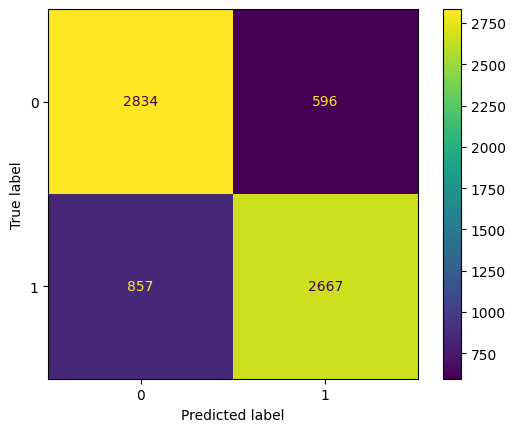

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(svc2_best, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
plt.show()

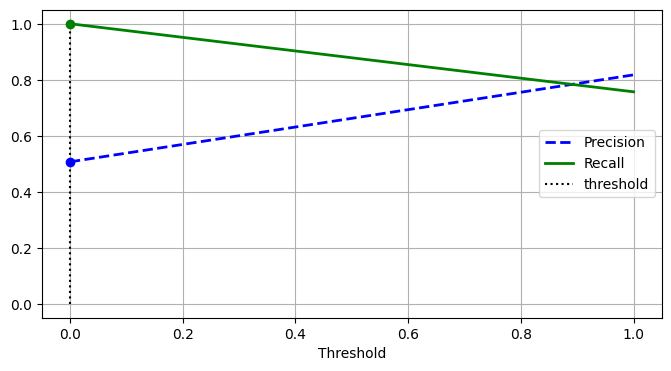

In [89]:
from sklearn.metrics import precision_recall_curve
#Precision vs Recall Trade Of

precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred)

threshold = 0
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
# plt.axis([-1, 1, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

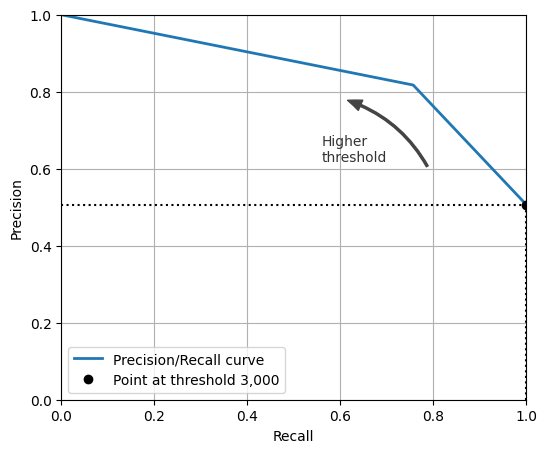

In [90]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score

In [92]:
idx_for_90_precision = (precisions >= 0.50).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print(threshold_for_90_precision)

y_train_pred_90 = (y_pred >= threshold_for_90_precision)

print(precision_score(y_train, y_train_pred_90))
recall_at_90_precision = recall_score(y_train, y_train_pred_90)
print(recall_at_90_precision)

0
0.5067587000287604
1.0


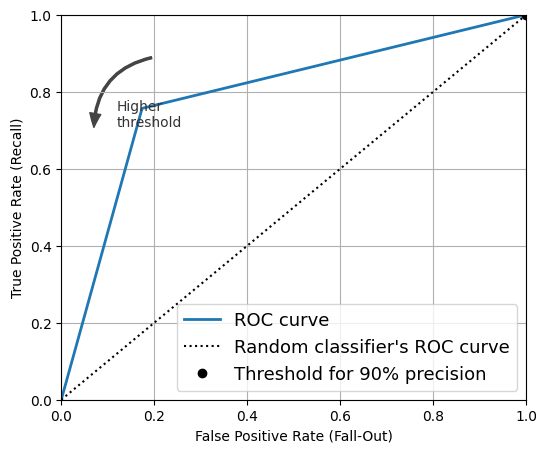

In [93]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

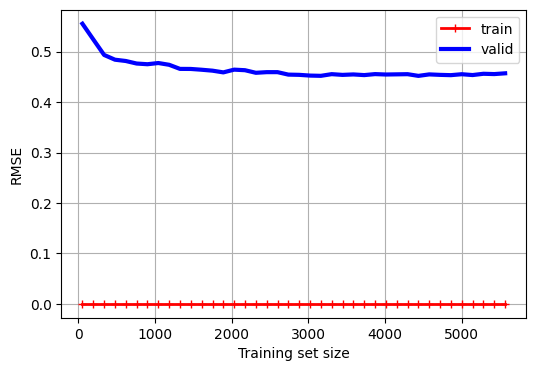

In [94]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    svc2_best, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
# plt.axis([0, 1000, 0.3, 0.9])
# plt.save_fig("underfitting_learning_curves_plot")

plt.show()

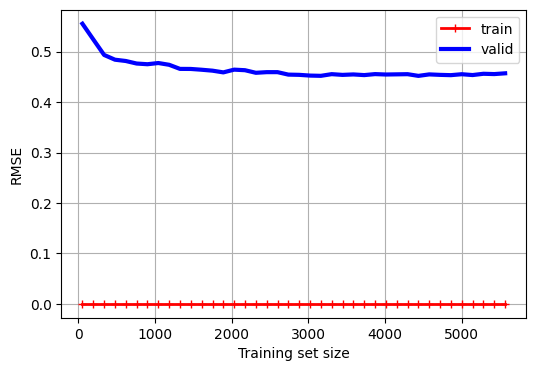

In [95]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
# plt.axis([0, 1000, 0.3, 0.9])
# plt.save_fig("underfitting_learning_curves_plot")

plt.show()

In [96]:
for score, name in zip(svc2_best.feature_importances_, X_train.columns):
    print(round(score, 3), name)

# extra code – this cell generates and saves Figure 7–6
heatmap_image = svc2_best.feature_importances_.reshape(5, 5)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[svc2_best.feature_importances_.min(),
                           svc2_best.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
# save_fig("mnist_feature_importance_plot")
plt.show()

0.062 pipeline-1__RoomService
0.059 pipeline-1__FoodCourt
0.051 pipeline-1__ShoppingMall
0.069 pipeline-1__Spa
0.063 pipeline-1__VRDeck
0.093 pipeline-1__CabinNumber
0.037 pipeline-2__HomePlanet
0.174 pipeline-2__CryoSleep
0.025 pipeline-2__Destination
0.003 pipeline-2__VIP
0.09 pipeline-2__Group
0.035 pipeline-2__Group_id
0.08 pipeline-2__Surname
0.053 pipeline-2__Deck
0.018 pipeline-2__CabinSide
0.066 pipeline-2__age
0.022 pipeline-2__total


ValueError: cannot reshape array of size 17 into shape (5,5)

In [ ]:
import joblib
with open('data_FAA/extraTree.pkl', 'wb') as f:
    joblib.dump(svc2_best, f)

In [ ]:
%%time

# always use same RANDOM_STATE k-folds for comparability between tests, reproducibility
RANDOMSTATE = 42
np.random.seed(RANDOMSTATE)

kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOMSTATE)

MEAN_RESPONSE=y_train.mean()
def cv_to_raw(cv_val, mean_response=MEAN_RESPONSE):
    """convert log1p rmse to underlying SalePrice error"""
    # MEAN_RESPONSE assumes folds have same mean response, which is true in expectation but not in each fold
    # we can also pass the mean response for each fold
    # but we're really just looking to consistently convert the log value to a more meaningful unit
    return np.expm1(mean_response+cv_val) - np.expm1(mean_response)
	
lr = LinearRegression()
# compute CV metric for each fold
scores = -cross_val_score(lr, X_train, y_train,
                          scoring="neg_root_mean_squared_error",
                          cv=kfolds,
                          n_jobs=-1)
raw_scores = [cv_to_raw(x) for x in scores]
print("Raw CV RMSE %.0f (STD %.0f)" % (np.mean(raw_scores), np.std(raw_scores)))

Raw CV RMSE 1 (STD 0)
CPU times: user 23 ms, sys: 5.78 ms, total: 28.8 ms
Wall time: 529 ms


In [ ]:
elasticnetcv = make_pipeline(RobustScaler(),
                             ElasticNetCV(max_iter=100000, 
                                          l1_ratio=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
                                          alphas=np.logspace(-4, -2, 9),
                                          cv=kfolds,
                                          n_jobs=-1,
                                          verbose=1,
                                         ))

#train and get hyperparams
elasticnetcv.fit(X_train, y_train)
l1_ratio = elasticnetcv._final_estimator.l1_ratio_
alpha = elasticnetcv._final_estimator.alpha_
print('l1_ratio', l1_ratio)
print('alpha', alpha)

# evaluate using kfolds on full dataset
# I don't see API to get CV error from elasticnetcv, so we use cross_val_score
elasticnet = ElasticNet(alpha=alpha,
                        l1_ratio=l1_ratio,
                        max_iter=10000)

scores = -cross_val_score(elasticnet, X_train, y_train,
                          scoring="neg_root_mean_squared_error",
                          cv=kfolds,
                          n_jobs=-1)
raw_scores = [cv_to_raw(x) for x in scores]
print()
print("Log1p CV RMSE %.04f (STD %.04f)" % (np.mean(scores), np.std(scores)))
print("Raw CV RMSE %.0f (STD %.0f)" % (np.mean(raw_scores), np.std(raw_scores)))
# l1_ratio 0.01
# alpha 0.0031622776601683794

# Log1p CV RMSE 0.1030 (STD 0.0109)
# Raw CV RMSE 18061 (STD 2008)
# CPU times: user 5.93 s, sys: 3.67 s, total: 9.6 s
# Wall time: 1.61 s

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
..............................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

l1_ratio 0.99
alpha 0.0017782794100389228

Log1p CV RMSE 0.4082 (STD 0.0071)
Raw CV RMSE 1 (STD 0)


In [ ]:
PARAMETERS = {'booster' : ['gbtree', "dart"],
              'gamma': [1, 5,],
              'eta': [0.05],
              'learning_rate': [0.05,0.1],
              "subsample": [1], 
              'max_depth': [8, 10],
              'n_estimators': [600, 1000],
              "colsample_bytree": [0.5,0.88],
              "scale_pos_weight": [1,],
              'reg_alpha': [0,1],
              'reg_lambda': [2,],}

# HalvingGridSearchCV
grid_search_xgb = HalvingGridSearchCV(estimator=xgb.XGBClassifier(objective="binary:logistic",
                                                           eval_metric="auc"),param_grid=PARAMETERS,verbose = 1,
                                                           cv = 10,scoring='accuracy',max_resources=1000,random_state = 0,
                                                           resource='n_samples',n_jobs=-1).fit(X_train.values, y_train.values.ravel())

xgbr_best = grid_search_xgb.best_estimator_
print("Extreme Gradient Boosting")
print('xgbr_best Best Score',grid_search_xgb.best_score_)
print('xgbr_best Best Parmas',grid_search_xgb.best_params_)
print('xgbr_best Accuracy',cross_val_score(xgbr_best,X_train.values, y_train.values.ravel(), cv=10).mean())

n_iterations: 3
n_required_iterations: 5
n_possible_iterations: 3
min_resources_: 40
max_resources_: 1000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 128
n_resources: 40
Fitting 10 folds for each of 128 candidates, totalling 1280 fits


KeyboardInterrupt: 

In [97]:
from sklearn.model_selection import cross_val_score
model = xgb.XGBClassifier(booster='dart', colsample_bytree=0.88, gamma=5, learning_rate=0.1)

In [98]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=1)
evalset = [(X_train2, y_train2), (X_val,y_val)]
model.fit(X_train2, y_train2, eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:0.65092	validation_1-logloss:0.65542
[1]	validation_0-logloss:0.61481	validation_1-logloss:0.62476
[2]	validation_0-logloss:0.58331	validation_1-logloss:0.59837
[3]	validation_0-logloss:0.56027	validation_1-logloss:0.57907
[4]	validation_0-logloss:0.54034	validation_1-logloss:0.56237
[5]	validation_0-logloss:0.52245	validation_1-logloss:0.54724
[6]	validation_0-logloss:0.50569	validation_1-logloss:0.53354
[7]	validation_0-logloss:0.49282	validation_1-logloss:0.52311
[8]	validation_0-logloss:0.47858	validation_1-logloss:0.51202
[9]	validation_0-logloss:0.46723	validation_1-logloss:0.50343
[10]	validation_0-logloss:0.45637	validation_1-logloss:0.49569
[11]	validation_0-logloss:0.44607	validation_1-logloss:0.48895
[12]	validation_0-logloss:0.43828	validation_1-logloss:0.48293
[13]	validation_0-logloss:0.43043	validation_1-logloss:0.47714
[14]	validation_0-logloss:0.42245	validation_1-logloss:0.47165
[15]	validation_0-logloss:0.41578	validation_1-logloss:0.46680
[1

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.88,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [99]:
from sklearn.metrics import accuracy_score
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.800


In [100]:
# retrieve performance metrics
results = model.evals_result()

In [101]:
X_train.head()

,pipeline-1__RoomService,pipeline-1__FoodCourt,pipeline-1__ShoppingMall,pipeline-1__Spa,pipeline-1__VRDeck,pipeline-1__CabinNumber,pipeline-2__HomePlanet,pipeline-2__CryoSleep,pipeline-2__Destination,pipeline-2__VIP,pipeline-2__Group,pipeline-2__Group_id,pipeline-2__Surname,pipeline-2__Deck,pipeline-2__CabinSide,pipeline-2__age,pipeline-2__total
8024,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,-0.067900,2.0,1.0,2.0,0.0,5756.0,0.0,2191.0,4.0,1.0,5.0,0.0
6142,-0.198354,-0.281027,1.045913,-0.270626,-0.260358,0.899316,0.0,0.0,2.0,0.0,4379.0,0.0,278.0,6.0,1.0,2.0,0.0
3707,1.509492,-0.281027,-0.281906,-0.267072,-0.263003,0.313064,2.0,0.0,2.0,0.0,2666.0,0.0,1547.0,5.0,1.0,5.0,0.0
2839,-0.331591,-0.281027,-0.283579,0.129197,-0.039029,-0.798247,0.0,0.0,2.0,0.0,2055.0,2.0,547.0,4.0,0.0,1.0,0.0
3688,-0.333105,0.472875,-0.283579,-0.270626,0.130274,-0.705473,0.0,0.0,1.0,0.0,2650.0,1.0,894.0,4.0,0.0,5.0,0.0


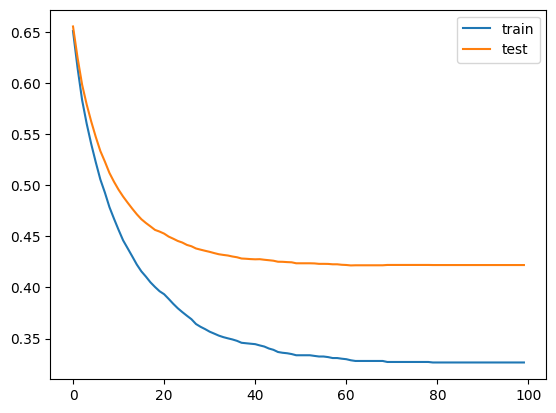

In [102]:
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='training')
plt.plot(results['validation_1']['logloss'], label='valid0')

# show the legend
plt.legend()
# show the plot
plt.show()

In [103]:
import lightgbm as lgb
regr = lgb.LGBMClassifier()
regr.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

[1]	valid_0's binary_logloss: 0.649109	valid_1's binary_logloss: 0.65147
[2]	valid_0's binary_logloss: 0.613251	valid_1's binary_logloss: 0.6176
[3]	valid_0's binary_logloss: 0.583383	valid_1's binary_logloss: 0.589353
[4]	valid_0's binary_logloss: 0.557518	valid_1's binary_logloss: 0.564888
[5]	valid_0's binary_logloss: 0.535101	valid_1's binary_logloss: 0.543493
[6]	valid_0's binary_logloss: 0.516136	valid_1's binary_logloss: 0.525805
[7]	valid_0's binary_logloss: 0.499348	valid_1's binary_logloss: 0.510371
[8]	valid_0's binary_logloss: 0.484233	valid_1's binary_logloss: 0.496197
[9]	valid_0's binary_logloss: 0.471165	valid_1's binary_logloss: 0.483639
[10]	valid_0's binary_logloss: 0.458895	valid_1's binary_logloss: 0.471856
[11]	valid_0's binary_logloss: 0.447977	valid_1's binary_logloss: 0.462044
[12]	valid_0's binary_logloss: 0.438096	valid_1's binary_logloss: 0.452993
[13]	valid_0's binary_logloss: 0.42955	valid_1's binary_logloss: 0.444744
[14]	valid_0's binary_logloss: 0.42182

LGBMClassifier()

In [104]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=1)
model = lgb.LGBMClassifier()
evalset = [(X_train2, y_train2), (X_val,y_val)]
model.fit(X_train2, y_train2)

LGBMClassifier()

In [105]:
y_hat = model.predict(X_test)
score = accuracy_score(y_test, yhat)

In [107]:
from sklearn.metrics import accuracy_score
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.792


In [108]:
results = model.evals_result()

AttributeError: 'LGBMClassifier' object has no attribute 'evals_result'

In [ ]:
results

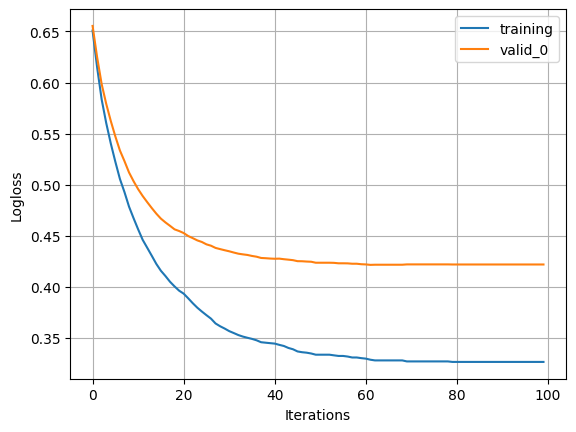

In [111]:
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='training')
plt.plot(results['validation_1']['logloss'], label='valid_0')
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Logloss")
# show the legend
plt.legend()
# show the plot
plt.show()

In [109]:
import sklearn.datasets, sklearn.model_selection

X, y = sklearn.datasets.load_boston(return_X_y=True)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, random_state=7054)

model = model = xgb.XGBClassifier(booster='dart', colsample_bytree=0.88, gamma=5, learning_rate=0.1)
model.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], verbose=10)

xgb.plot_metric(model)

[0]	validation_0-logloss:0.65426	validation_1-logloss:0.65232
[10]	validation_0-logloss:0.48319	validation_1-logloss:0.46466
[20]	validation_0-logloss:0.43337	validation_1-logloss:0.39829
[30]	validation_0-logloss:0.41343	validation_1-logloss:0.36815
[40]	validation_0-logloss:0.40613	validation_1-logloss:0.35504
[50]	validation_0-logloss:0.40079	validation_1-logloss:0.34490
[60]	validation_0-logloss:0.39965	validation_1-logloss:0.34224
[70]	validation_0-logloss:0.39814	validation_1-logloss:0.33765
[80]	validation_0-logloss:0.39775	validation_1-logloss:0.33400
[90]	validation_0-logloss:0.39642	validation_1-logloss:0.33194
[99]	validation_0-logloss:0.39649	validation_1-logloss:0.33175


AttributeError: module 'xgboost' has no attribute 'plot_metric'

In [ ]:
sns.lineplot(results['validation_0']['logloss'], label='training')
sns.lineplot(results['validation_1']['logloss'], label='valid_0')
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Logloss")
# show the legend
plt.legend()
# show the plot
plt.show()

[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[10]	training's l2: 0.139857	valid_0's l2: 0.151772
[20]	training's l2: 0.113067	valid_0's l2: 0.1352
[30]	training's l2: 0.100729	valid_0's l2: 0.131085
[40]	training's l2: 0.0927695	valid_0's l2: 0.13118
[50]	training's l2: 0.0870501	valid_0's l2: 0.131458
[60]	training's l2: 0.0822347	valid_0's l2: 0.131836
[70]	training's l2: 0.078191	valid_0's l2: 0.132482
[80]	training's l2: 0.0742554	valid_0's l2: 0.133616
[90]	training's l2: 0.0703479	valid_0's l2: 0.134381
[100]	training's l2: 0.0667589	valid_0's l2: 0.135278
[110]	training's l2: 0.0635804	valid_0's l2: 0.136106
[120]	training's l2: 0.0611797	valid_0's l2: 0.136582
[130]	training's l2: 0.0587749	valid_0's l2: 0.136941
[140]	training's l2: 0.0561737	valid_0's l2: 0.13706
[150]	training's l2: 0.0537688	valid_0's l2: 0.138254
[160]	training's l2: 0.0518148	valid_0's l2: 0.138895
[170]	training's l2: 0.0497461	valid_0's l2: 0.139757


<AxesSubplot: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

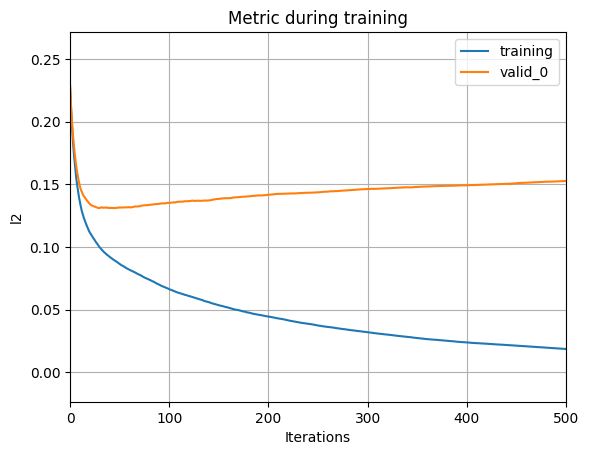

In [110]:
import lightgbm as lgb
import sklearn.datasets, sklearn.model_selection
X, y = sklearn.datasets.load_boston(return_X_y=True)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, random_state=7054)

model = lgb.LGBMRegressor(objective='mse', seed=42, num_threads=1, num_iterations=500)
model.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)], verbose=10)

lgb.plot_metric(model)

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
with open('data_FAA/data.pkl', 'wb') as f:
    joblib.dump([X_train, y_train, X_test, y_test], f)

In [ ]:
validation_curve()

In [ ]:
PARAMETERS = {'normalize' : [True, False],
              'positive': [True, False],}

# HalvingGridSearchCV
grid_search_xgb = HalvingGridSearchCV(estimator=RidgeClassifier(),param_grid=PARAMETERS,verbose = 1,
                                                           cv = 10,scoring='accuracy',max_resources=1000,random_state = 0,
                                                           resource='n_samples',n_jobs=-1).fit(X_train.values, y_train.values.ravel())

xgbr_best = grid_search_xgb.best_estimator_
print("Elastic Net")
print('xgbr_best Best Score',grid_search_xgb.best_score_)
print('xgbr_best Best Parmas',grid_search_xgb.best_params_)
print('xgbr_best Accuracy',cross_val_score(xgbr_best,X_train.values, y_train.values.ravel(), cv=10).mean())
# print('xgbr feature importances',grid_search_xgb.feature_importances_)

In [ ]:
perm = PermutationImportance(grid_search_xgb, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
pred = grid_search_xgb.predict(X_test)
print(classification_report(y_test, pred, target_names=["0","1"]))
plot_roc_curve(grid_search_xgb, X_test, y_test)
#Comentário

In [ ]:
#----------------For submission----------------
data1= pd.read_csv("data_FAA/train.csv")
data2 = pd.read_csv("data_FAA/test.csv")
data2['Transported'] =-1
dataT = pd.concat([data1,data2],axis = 0,ignore_index=True)

df_T,target = preprocess(dataT,preTrain = False)
X_testT = df_T[df_T['Transported'] ==-1]
X_testT = X_testT.drop(['Transported'],axis = 1)

pred = grid_search_xgb.predict(X_testT)
pred = pred.astype(bool)

result=pd.read_csv('data_FAA/sample_submission.csv')
result['Transported'] = pred
result.to_csv('submission.csv', index=False)

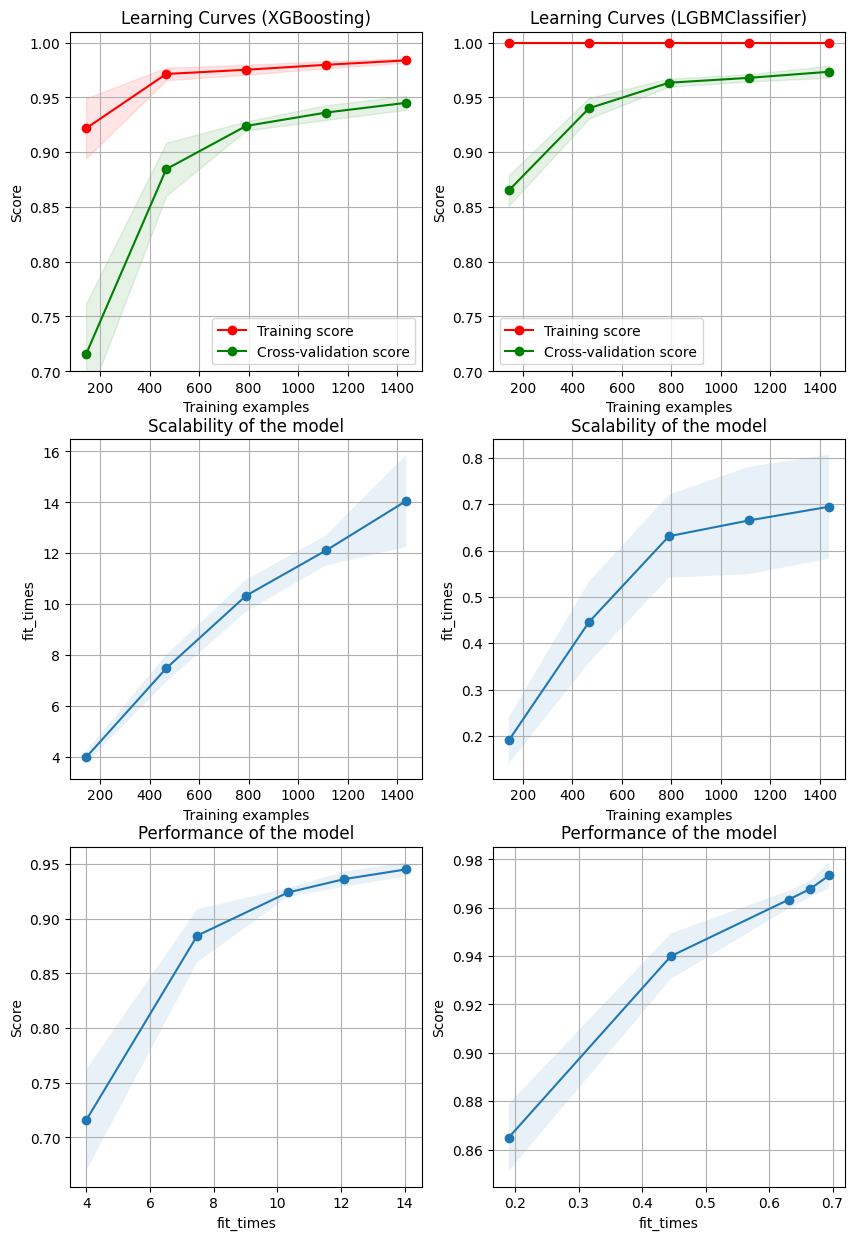

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (XGBoosting)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

estimator = xgb.XGBClassifier(booster='dart', colsample_bytree=0.88, gamma=5, learning_rate=0.1)
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (LGBMClassifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = lgb.LGBMClassifier()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

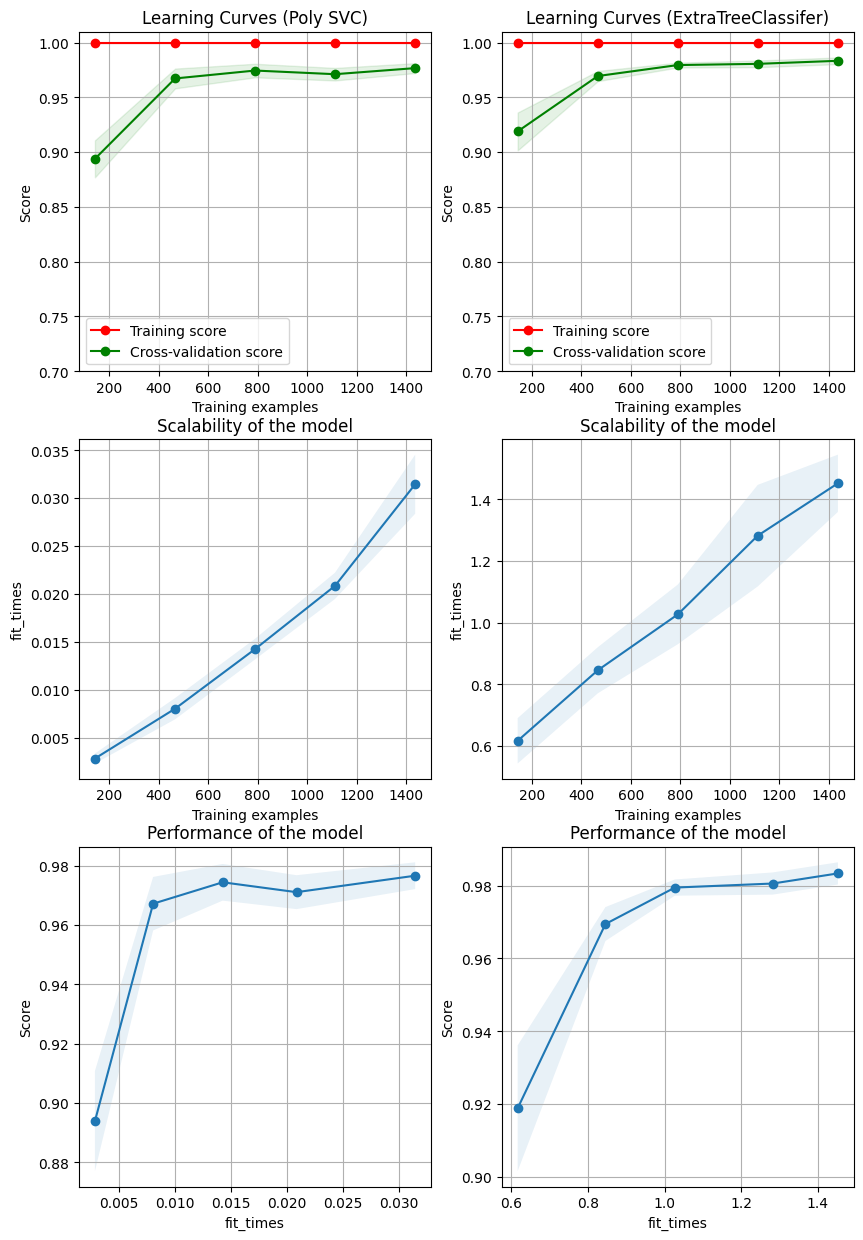

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 4, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Poly SVC)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

estimator = SVC(kernel="poly", degree=7, C=11)
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = r"Learning Curves (ExtraTreeClassifer)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = ExtraTreesClassifier(max_features="sqrt", n_estimators=750)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

In [ ]:
models

In [ ]:
import plotly.express as px

In [ ]:
import plotly.express as px

line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()